# **Final**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 1. Problem Framing & Constants ---

# Define the target variable and the business rule for its creation
TARGET_COL = 'is_underperforming'
RATING_THRESHOLD = 4.0
SALES_THRESHOLD = 50

# Define feature types for the preprocessor
NUMERIC_COLS = [
    'rating', 'price_whole', 'mrp', 'number_of_global_ratings',
    'number_of_reviews', 'discount_percentage_cleaned', 'product_weight_grams'
]
CATEGORICAL_COLS = ['category_reclassified']


# --- 2. Data Loading & Feature Engineering ---
print("--- Step 1: Loading and Preparing Data ---")
try:
    df = pd.read_csv('Haldirams_reclassified_entire_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Haldirams_reclassified_entire_dataset.csv' not found.")
    exit()

# Engineer the target variable based on the defined rule
df[TARGET_COL] = ((df['rating'] < RATING_THRESHOLD) & (df['sales_numeric'] < SALES_THRESHOLD)).astype(int)

# Clean the data by dropping rows with missing values in our selected columns
features_to_check = NUMERIC_COLS + CATEGORICAL_COLS + ['sales_numeric']
df_clean = df.dropna(subset=features_to_check)

# Define the final features (X) and target (y)
X = df_clean[NUMERIC_COLS + CATEGORICAL_COLS]
y = df_clean[TARGET_COL]

print(f"Data prepared. Total samples: {len(df_clean)}")
print(f"Underperforming products (class 1): {y.sum()} ({y.mean()*100:.2f}%)")


# --- 3. Data Splitting ---
print("\n--- Step 2: Splitting Data into Training and Test Sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {len(X_train)} rows")
print(f"Test set size: {len(X_test)} rows")


# --- 4. Preprocessing & Modeling Pipelines ---
print("\n--- Step 3: Defining Preprocessing and Model Pipelines ---")
# Create a preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_COLS)
    ],
    remainder='passthrough'
)

# Define the three models to be trained
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    print(f"Pipeline created for: {name}")


# --- 5. Model Training and Evaluation ---
print("\n--- Step 4: Training and Evaluating Models ---")
results = {}
for name, pipe in pipelines.items():
    print(f"\nTraining {name}...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Store results
    results[name] = {
        'report': classification_report(y_test, y_pred, target_names=['Not Underperforming', 'Underperforming']),
        'cm': confusion_matrix(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Display classification reports
for name, res in results.items():
    print(f"\n--- Classification Report for {name} ---")
    print(res['report'])


# --- 6. Comparison and Visualization ---
print("\n--- Step 5: Visualizing and Comparing Model Performance ---")

# Plotting Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Confusion Matrices for Each Model', fontsize=16)

for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create a summary DataFrame for comparison
summary_data = []
for name, res in results.items():
    report_dict = classification_report(y_test, pipelines[name].predict(X_test), output_dict=True)
    underperforming_metrics = report_dict['1'] # Metrics for the 'Underperforming' class
    summary_data.append({
        'Model': name,
        'Overall Accuracy': res['accuracy'],
        'Precision (Underperforming)': underperforming_metrics['precision'],
        'Recall (Underperforming)': underperforming_metrics['recall'],
        'F1-Score (Underperforming)': underperforming_metrics['f1-score']
    })

summary_df = pd.DataFrame(summary_data).set_index('Model')
print("\n--- Model Performance Summary ---")
print(summary_df)

--- Step 1: Loading and Preparing Data ---
Error: 'Haldirams_reclassified_entire_dataset.csv' not found.


NameError: name 'df' is not defined

: 

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5

# **Hypertuning of all models**

--- Step 1: Loading and Preparing Data ---
Dataset loaded successfully!

--- Step 2: Splitting Data into Training and Test Sets ---

--- Step 3: Defining Preprocessing and Models ---

--- Step 4: Training, Tuning, and Evaluating Models ---

Processing Model: Logistic Regression...
Tuning Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Processing Model: Decision Tree...
Tuning Decision Tree...

Processing Model: Random Forest...
Tuning Random Forest...

--- Step 5: Visualizing and Comparing Model Performance ---


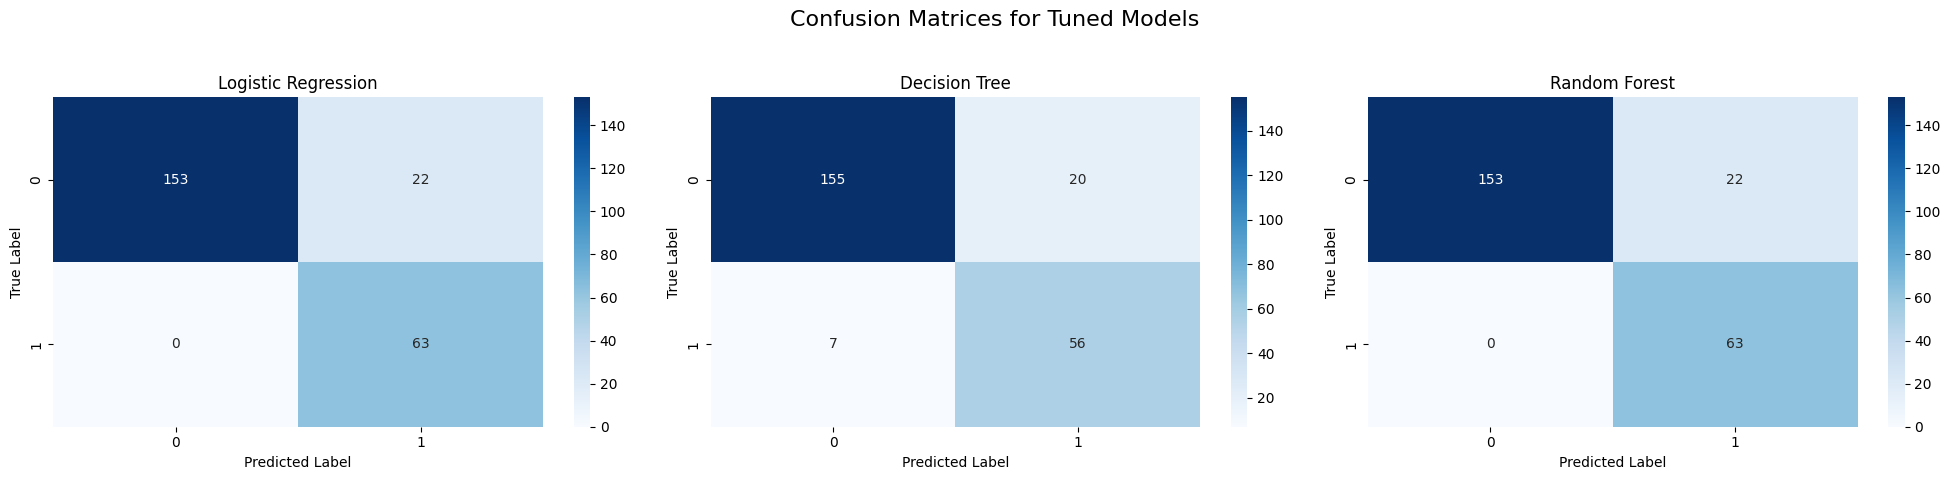


--- Baseline vs. Tuned Model F1-Score Summary (for 'Underperforming' class) ---
                     Baseline F1  Tuned F1
Model                                     
Logistic Regression     0.828571  0.851351
Decision Tree           0.777778  0.805755
Random Forest           0.840580  0.851351

--- Detailed Report for the Best Tuned Model: Logistic Regression ---
                     precision    recall  f1-score   support

Not Underperforming       1.00      0.87      0.93       175
    Underperforming       0.74      1.00      0.85        63

           accuracy                           0.91       238
          macro avg       0.87      0.94      0.89       238
       weighted avg       0.93      0.91      0.91       238

Successfully saved the 'Logistic Regression' pipeline to 'best_performing_model.pkl'
Starting download for 'best_performing_model.pkl'...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import pickle
from google.colab import files

# --- 1. Problem Framing & Constants ---
TARGET_COL = 'is_underperforming'
RATING_THRESHOLD = 4.0
SALES_THRESHOLD = 50
NUMERIC_COLS = [
    'rating', 'price_whole', 'mrp', 'number_of_global_ratings',
    'number_of_reviews', 'discount_percentage_cleaned', 'product_weight_grams'
]
CATEGORICAL_COLS = ['category_reclassified']

# --- 2. Data Loading & Feature Engineering ---
print("--- Step 1: Loading and Preparing Data ---")
try:
    df = pd.read_csv('Haldirams_reclassified_entire_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Haldirams_reclassified_entire_dataset.csv' not found.")
    exit()

df[TARGET_COL] = ((df['rating'] < RATING_THRESHOLD) & (df['sales_numeric'] < SALES_THRESHOLD)).astype(int)
features_to_check = NUMERIC_COLS + CATEGORICAL_COLS + ['sales_numeric']
df_clean = df.dropna(subset=features_to_check)
X = df_clean[NUMERIC_COLS + CATEGORICAL_COLS]
y = df_clean[TARGET_COL]

# --- 3. Data Splitting ---
print("\n--- Step 2: Splitting Data into Training and Test Sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Preprocessing & Modeling Pipelines ---
print("\n--- Step 3: Defining Preprocessing and Models ---")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_COLS),
        ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_COLS)
    ],
    remainder='passthrough'
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# --- DEFINE HYPERPARAMETER GRIDS ---
param_grids = {
    "Logistic Regression": {
        'classifier__C': np.logspace(-4, 4, 20),
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4, 8]
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300, 500],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None]
    }
}


# --- 5. Model Training, Tuning, and Evaluation ---
print("\n--- Step 4: Training, Tuning, and Evaluating Models ---")
results = []
tuned_pipelines = {}

for name, model in models.items():
    print(f"\nProcessing Model: {name}...")

    # Create the full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # --- Baseline Model Evaluation ---
    pipeline.fit(X_train, y_train)
    y_pred_base = pipeline.predict(X_test)
    baseline_f1 = f1_score(y_test, y_pred_base) # F1 for the positive class (underperforming)

    # --- Hyperparameter Tuning ---
    print(f"Tuning {name}...")
    search = RandomizedSearchCV(
        pipeline,
        param_grids[name],
        n_iter=50,
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train, y_train)

    # --- Tuned Model Evaluation ---
    best_pipeline = search.best_estimator_
    tuned_pipelines[name] = best_pipeline
    y_pred_tuned = best_pipeline.predict(X_test)
    tuned_f1 = f1_score(y_test, y_pred_tuned)

    # Store results
    results.append({
        'Model': name,
        'Baseline F1': baseline_f1,
        'Tuned F1': tuned_f1,
    })

# --- 6. Comparison and Visualization ---
print("\n--- Step 5: Visualizing and Comparing Model Performance ---")

# Plotting Confusion Matrices for TUNED models
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Confusion Matrices for Tuned Models', fontsize=16)

for i, (name, pipe) in enumerate(tuned_pipelines.items()):
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display final comparison summary
summary_df = pd.DataFrame(results).set_index('Model')
print("\n--- Baseline vs. Tuned Model F1-Score Summary (for 'Underperforming' class) ---")
print(summary_df)

# Display detailed report for the best tuned model
best_model_name = summary_df['Tuned F1'].idxmax()
print(f"\n--- Detailed Report for the Best Tuned Model: {best_model_name} ---")
best_model_pipeline = tuned_pipelines[best_model_name]
y_pred_best = best_model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=['Not Underperforming', 'Underperforming']))

if best_model_pipeline:
    filename = 'best_performing_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(best_model_pipeline, file)
    print(f"Successfully saved the '{best_model_name}' pipeline to '{filename}'")

    # --- 3. Trigger the Download in Colab ---
    print(f"Starting download for '{filename}'...")
    files.download(filename)
    print("Download complete.")
else:
    print("Could not find the best model pipeline to save.")

2025/10/01 18:08:59 INFO mlflow.tracking.fluent: Experiment with name 'Haldirams_Final_Evaluation' does not exist. Creating a new experiment.


--- Step 1: Loading Data and Creating Train/Validation/Test Splits ---
Train: 830, Validation: 178, Test: 178

--- Step 2: Loading the Best Performing Model ---
Loaded 'best_performing_model.pkl' successfully.

--- Step 3: Tuning Probability Threshold on Validation Set ---
Optimal Threshold for F1-Score: 0.5541

--- Step 4: Computing Final Metrics on Validation and Test Sets ---
Metrics computed successfully.

--- Step 5: Logging Experiment to MLflow ---


/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/10/01 18:09:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Successfully logged run to MLflow experiment: 'Haldirams_Final_Evaluation'
To view, run 'mlflow ui' in your terminal.


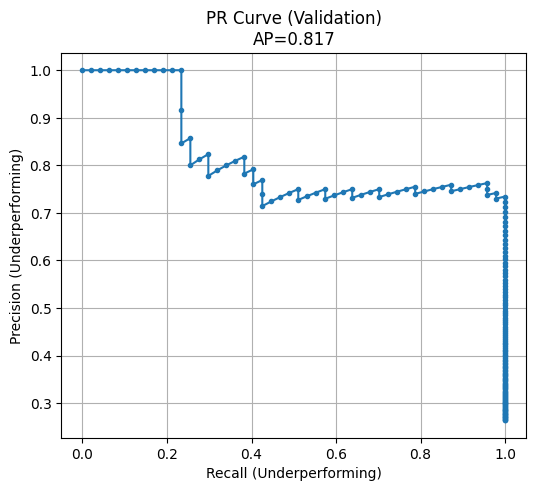

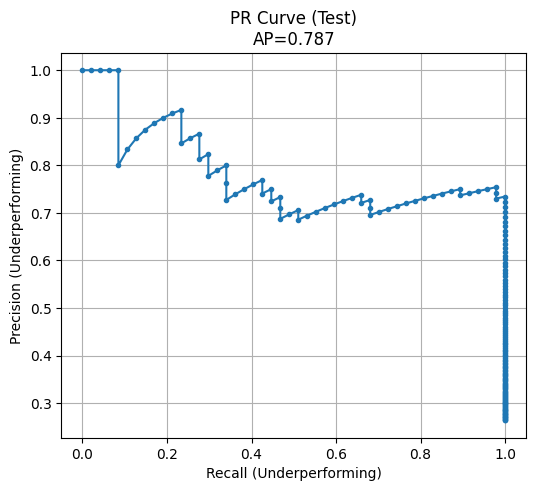

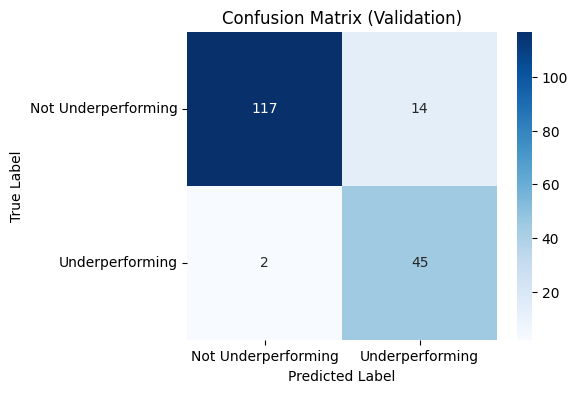

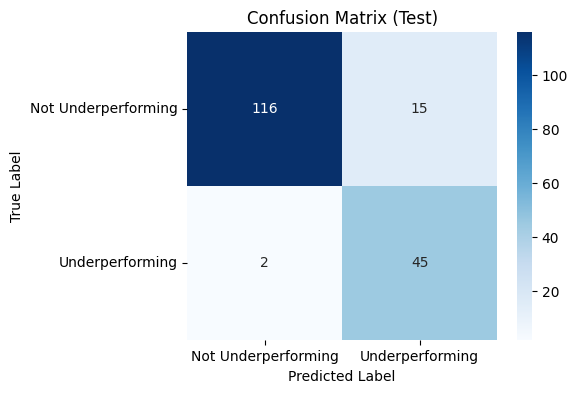

In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve, confusion_matrix, average_precision_score,
    roc_auc_score, f1_score, accuracy_score
)
from mlflow.models.signature import infer_signature

# --- 1. Load Data & Recreate Splits ---
# In a real project, you'd save splits. Here, we recreate them for consistency.
# NOTE: We create a validation set here, which is best practice.
print("--- Step 1: Loading Data and Creating Train/Validation/Test Splits ---")
TARGET_COL = 'is_underperforming'
RATING_THRESHOLD = 4.0
SALES_THRESHOLD = 50
NUMERIC_COLS = [
    'rating', 'price_whole', 'mrp', 'number_of_global_ratings',
    'number_of_reviews', 'discount_percentage_cleaned', 'product_weight_grams'
]
CATEGORICAL_COLS = ['category_reclassified']

df = pd.read_csv('Haldirams_reclassified_entire_dataset.csv')
df[TARGET_COL] = ((df['rating'] < RATING_THRESHOLD) & (df['sales_numeric'] < SALES_THRESHOLD)).astype(int)
features_to_check = NUMERIC_COLS + CATEGORICAL_COLS + ['sales_numeric']
df_clean = df.dropna(subset=features_to_check)
X = df_clean[NUMERIC_COLS + CATEGORICAL_COLS]
y = df_clean[TARGET_COL]

# Split: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

# --- 2. Load the Winning Model ---
print("\n--- Step 2: Loading the Best Performing Model ---")
try:
    best_pipe = joblib.load("best_performing_model.pkl")
    print("Loaded 'best_performing_model.pkl' successfully.")
except FileNotFoundError:
    print("Error: 'best_performing_model.pkl' not found. Please run the previous tuning script first.")
    exit()

# --- 3. Tune Probability Threshold ---
print("\n--- Step 3: Tuning Probability Threshold on Validation Set ---")
val_proba_tmp = best_pipe.predict_proba(X_val)[:,1]
prec_tmp, rec_tmp, thr_tmp = precision_recall_curve(y_val, val_proba_tmp)
f1s_tmp = (2 * prec_tmp * rec_tmp) / (prec_tmp + rec_tmp + 1e-9)
best_f1_idx = np.nanargmax(f1s_tmp)
THRESHOLD = float(thr_tmp[best_f1_idx])
print(f"Optimal Threshold for F1-Score: {THRESHOLD:.4f}")

# --- 4. Compute Final Metrics ---
print("\n--- Step 4: Computing Final Metrics on Validation and Test Sets ---")
val_proba = best_pipe.predict_proba(X_val)[:,1]
val_pred  = (val_proba >= THRESHOLD).astype(int)
test_proba = best_pipe.predict_proba(X_test)[:,1]
test_pred  = (test_proba >= THRESHOLD).astype(int)

metrics_val = {
    "val_pr_auc": float(average_precision_score(y_val, val_proba)),
    "val_roc_auc": float(roc_auc_score(y_val, val_proba)),
    "val_f1_score": float(f1_score(y_val, val_pred)),
    "val_accuracy": float(accuracy_score(y_val, val_pred)),
}
metrics_test = {
    "test_pr_auc": float(average_precision_score(y_test, test_proba)),
    "test_roc_auc": float(roc_auc_score(y_test, test_proba)),
    "test_f1_score": float(f1_score(y_test, test_pred)),
    "test_accuracy": float(accuracy_score(y_test, test_pred)),
}
print("Metrics computed successfully.")

# --- 5. Plotting Helpers ---
def fig_pr_curve(y_true, y_proba, title):
    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    ap = average_precision_score(y_true, y_proba)
    fig = plt.figure(figsize=(6,5)); plt.plot(rec, prec, marker='.');
    plt.xlabel("Recall (Underperforming)"); plt.ylabel("Precision (Underperforming)");
    plt.title(f"{title}\nAP={ap:.3f}"); plt.grid(True); return fig

def fig_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    fig = plt.figure(figsize=(5,4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xticks([0.5,1.5], ["Not Underperforming", "Underperforming"])
    plt.yticks([0.5,1.5], ["Not Underperforming", "Underperforming"], rotation=0, va='center')
    plt.title(title); plt.xlabel("Predicted Label"); plt.ylabel("True Label"); return fig, cm

# --- 6. MLflow Logging ---
print("\n--- Step 5: Logging Experiment to MLflow ---")
EXPERIMENT_NAME = "Haldirams_Final_Evaluation"
mlflow.set_experiment(EXPERIMENT_NAME)

with mlflow.start_run(run_name=f"final_run_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
    model_name = best_pipe.named_steps['classifier'].__class__.__name__

    # Log Params
    mlflow.log_param("winning_model", model_name)
    mlflow.log_param("optimal_threshold", float(THRESHOLD))
    # Log specific model hyperparameters from the pipeline
    clf_params = best_pipe.named_steps['classifier'].get_params()
    for key, value in clf_params.items():
        mlflow.log_param(key, value)

    # Log Metrics
    mlflow.log_metrics(metrics_val)
    mlflow.log_metrics(metrics_test)

    # Log Artifacts (Plots)
    mlflow.log_figure(fig_pr_curve(y_val, val_proba, "PR Curve (Validation)"), "plots/pr_curve_val.png")
    mlflow.log_figure(fig_pr_curve(y_test, test_proba, "PR Curve (Test)"), "plots/pr_curve_test.png")
    fig_cm_val, cm_val = fig_confusion(y_val, val_pred, "Confusion Matrix (Validation)")
    fig_cm_test, cm_test = fig_confusion(y_test, test_pred, "Confusion Matrix (Test)")
    mlflow.log_figure(fig_cm_val, "plots/confusion_val.png")
    mlflow.log_figure(fig_cm_test, "plots/confusion_test.png")
    mlflow.log_dict({"labels":[0,1], "cm_val": cm_val.tolist(), "cm_test": cm_test.tolist()}, "metrics/confusion_matrices.json")

    # Log Model with Signature
    X_example = X_val.head(5)
    signature = infer_signature(X_example, best_pipe.predict_proba(X_example))
    mlflow.sklearn.log_model(
        sk_model=best_pipe,
        artifact_path="model", # (name is preferred over artifact_path)
        signature=signature,
        input_example=X_example
    )

print(f"\nSuccessfully logged run to MLflow experiment: '{EXPERIMENT_NAME}'")
print("To view, run 'mlflow ui' in your terminal.")

In [1]:
import os
import json
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def _get_proba_or_score(model, X):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)
        if proba is None:
            return None
        return proba[:, 1] if proba.ndim == 2 else proba
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = np.min(s), np.max(s)
        return (s - s_min) / (s_max - s_min + 1e-12)
    return None

def evaluate_and_export(models_dict, X_test, y_test, output_dir_candidates=None):
    if output_dir_candidates is None:
        output_dir_candidates = [
            Path("../dashboard/artifacts"),
            Path("./dashboard/artifacts"),
            Path.cwd() / "dashboard" / "artifacts",
        ]

    results = []
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)
        results.append({"model": name, "metric": "accuracy", "value": float(accuracy_score(y_test, y_pred))})

        labels = set(np.unique(y_test))
        f1 = f1_score(y_test, y_pred, average="binary" if labels <= {0, 1} else "weighted")
        results.append({"model": name, "metric": "f1", "value": float(f1)})

        proba = _get_proba_or_score(model, X_test)
        if proba is not None and labels <= {0, 1}:
            try:
                roc = roc_auc_score(y_test, proba)
                results.append({"model": name, "metric": "roc_auc", "value": float(roc)})
            except Exception:
                pass

    df = pd.DataFrame(results)

    out_dir = None
    for p in output_dir_candidates:
        try:
            p.mkdir(parents=True, exist_ok=True)
            out_dir = p
            break
        except Exception:
            continue
    if out_dir is None:
        raise RuntimeError("Could not create artifacts directory")

    csv_path = out_dir / "experiment_results.csv"
    json_path = out_dir / "experiment_results.json"
    df.to_csv(csv_path, index=False)
    with open(json_path, "w") as f:
        json.dump(results, f, indent=2)

    print(f"Wrote {len(df)} rows to {out_dir}")
    print(f"CSV:  {csv_path}")
    print(f"JSON: {json_path}")
    return df, out_dir